# Data Cleaning - D206 Project

## Medical Data


For this project, I have chosen the medical data set ("medical_raw data.csv").  This data contains information about patients at a hospital, including whether or not they were readmitted.  Readmission of patients is a problem in the medical industry, and hospitals are penalized based on excessive readmissions.

In [1]:
import pandas as pd
import numpy as np

dfMed = pd.read_csv('medical_raw data.csv')
dfMed.shape

(10000, 53)

The dataset contains 10000 rows and 53 columns.

### Part I: Research Question 
#### A. Describe one question or decision that you will address using the data set you chose. The summarized question or decision must be relevant to a realistic organizational need or situation.

We will attempt the most basic question in order to lower readmission rates - Can we determine which parameters drive higher rates of readmission?

#### B.  Describe the variables in the data set and indicate the specific type of data being described. Use examples from the data set that support your claims. 

First we will load the file and look at the top few records of each column.

In [2]:
# Allows all columns to return
pd.set_option('max_columns', None)

# View first 5 records to get an idea of the data
dfMed.head()

,Unnamed: 0,ID,Customer_id,Interaction,UID,zip,Lat,Lng,City,State,Population,County,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,ReAdmis,Gender,vitD_levels,doc_visits,full_meals_eaten,vitD_supp,Soft_drink,Initial_Admin,HighBlood,Stroke,Complication_Risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_Days,TotalCharge,Additional_Charges,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,35621,34.34960,-86.72508,Eva,AL,2951,Morgan,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,No,Male,17.802330,6,0,0,NaN,Emergency Admission,Yes,No,Medium,0.0,Yes,Yes,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403417,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,32446,30.84513,-85.22907,Marianna,FL,11303,Jackson,Urban,America/Chicago,Community development worker,3.0,51.0,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,No,Female,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,1.0,No,No,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998119,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,57110,43.54321,-96.63772,Sioux Falls,SD,17125,Minnehaha,Suburban,America/Chicago,Chief Executive Officer,3.0,53.0,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,No,Female,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,1.0,No,Yes,No,No,NaN,No,No,No,Blood Work,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,56072,43.89744,-93.51479,New Richland,MN,2162,Waseca,Suburban,America/Chicago,Early years teacher,0.0,78.0,GED or Alternative Credential,Retired,39741.49,Married,No,Male,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,0.0,Yes,No,No,No,NaN,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,23181,37.59894,-76.88958,West Point,VA,5287,King William,Rural,America/New_York,Health promotion specialist,NaN,22.0,Regular High School Diploma,Full Time,1209.56,Widowed,No,Female,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,0.0,No,No,Yes,No,0.0,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3


In [3]:
# Get an overview of the numeric fields
dfMed.describe()

,Unnamed: 0,ID,zip,Lat,Lng,Population,Children,Age,Income,vitD_levels,doc_visits,full_meals_eaten,vitD_supp,Overweight,Anxiety,Initial_Days,TotalCharge,Additional_Charges,item1,item2,item3,item4,item5,item6,item7,item8
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7412.000000,7586.000000,7536.000000,10000.000000,10000.000000,10000.000000,10000.000000,9018.000000,9016.000000,8944.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.098219,53.295676,40484.438268,19.412675,5.012200,1.001400,0.398900,0.709137,0.322316,34.432082,5891.538261,12934.528585,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.155427,20.659182,28664.861050,6.723277,1.045734,1.008117,0.628505,0.454186,0.467389,26.287050,3377.558136,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,1.00000,610.000000,17.967190,-174.209690,0.000000,0.000000,18.000000,154.080000,9.519012,1.000000,0.000000,0.000000,0.000000,0.000000,1.001981,1256.751699,3125.702716,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,35.000000,19450.792500,16.513171,4.000000,0.000000,0.000000,0.000000,0.000000,7.911709,3253.239465,7986.487642,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33942.280000,18.080560,5.000000,1.000000,0.000000,1.000000,0.000000,34.446941,5852.250564,11573.979364,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54075.235000,19.789740,6.000000,2.000000,1.000000,1.000000,1.000000,61.124654,7614.989701,15626.491035,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.130000,53.019124,9.000000,7.000000,5.000000,1.000000,1.000000,71.981486,21524.224212,30566.073127,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [4]:
# Find the distinct count of values in each column
dfMed.nunique()

Unnamed: 0            10000
ID                    10000
Customer_id           10000
Interaction           10000
UID                   10000
zip                    8612
Lat                    8588
Lng                    8601
City                   6072
State                    52
Population             5951
County                 1607
Area                      3
Timezone                 26
Job                     639
Children                 11
Age                      72
Education                12
Employment                5
Income                 7531
Marital                   5
ReAdmis                   2
Gender                    3
vitD_levels           10000
doc_visits                9
full_meals_eaten          8
vitD_supp                 6
Soft_drink                2
Initial_Admin             3
HighBlood                 2
Stroke                    2
Complication_Risk         3
Overweight                2
Arthritis                 2
Diabetes                  2
Hyperlipidemia      

##### Findings
Based on the data, data dictionary, and numeric summaries, here is a brief summary review of each column.

1. Unnamed: 0
 - This appears to be an order index ranging from 1-10000.  The data dictionary listed CaseOrder as the first column and as a placeholder for the sort order, but that actually appears to be stored in both of the first two columns.
2. ID
 - See above
3. Customer_id
 - A unique patient ID, consisting of numbers and characters.
4. Interaction
 - A unique ID, storing a GUID
5. UID
 - A unique ID, consisting of numbers and characters.
6. zip
 - The postal code of the patient's residence.  Over 8600 postal codes are included.
7. Lat
 - The latitude of the patient's residence.
8. Lng
 - The longitude of the patient's residence.
9. City
 - The city of the patient's residence.  Over 6000 cities are included.
10. State
 - The state of the patient's residence.  Over 50 are included.  This could indicate Nulls, blanks, or smaller regions like the District of Columbia or Puerto Rico.
11. Population
 - The population with a mile radius of the patient's residence.
12. County
 - The county of the patient's residence.
13. Area
 - A classification of the patient's residence.  Options are Rural, Urban, and Suburban.
14. Timezone
 - The timezone of the patient's residence.
15. Job
 - A string describing the occupation of the primary insurance holder.
16. Children
 - The number of children in the patient's household.  This includes children that are not direct children of the patient.
17. Age
 - The age of the patient during admission.
18. Education
 - The education level of the primary insurance holder.
19. Employment
 - The employeement status of the primary insurance holder.
20. Income
 - The annual income of the primary insurance holder.
21. Marital
 - The marital status of the primary insurance holder.
22. ReAdmis
 - A Yes or No stating if the patient was readmitted.
23. Gender
 - The gender (male/female).  Has 3 distinct values, so an empty, null, or 3rd option exists.
24. vitD_levels
 - The patient's vitamin D levels measured in ng/mL
25. doc_visits
 - The number of times the doctor visited the patient during the initial hospitalization.
26. full_meals_eaten
 - The number of full meals the patient ate during hospitalization.
27. vitD_supp
 - The number of times vitamin D supplements were administered to the patient.
28. Soft_drink
 - Yes or No indicating if the patient drinks more than 3 sodas per day.
29. Initial_Admin
 - A categorical value describing how the patient was initially admitted to the hospital - Observation, Elective, or Emergency.
30. HighBlood
 - Yes or No indicating if the patient has high blood pressure.
31. Stroke
 - Yes or No indicating if the patient has had a stroke.
32. Complication_Risk
 - Level of complication risk for the patient as assessed by the doctor (high, medium, or low).
33. Overweight
 - Yes or No indicating if the patient is overweight based on age, gender, and height.
34. Arthritis
 - Yes or No indicating if the patient has arthritis.
35. Diabetes
 - Yes or No indicating if the patient has diabetes.
36. Hyperlipidemia
 - Yes or No indicating if the patient has hyperlipidemia.
37. BackPain
 - Yes or No indicating if the patient has back pain.
38. Anxiety
 - Yes or No indicating if the patient has anxiety.
39. Allergic_rhinitis
 - Yes or No indicating if the patient has allergic rhinitis.
40. Reflux_esophagitis
 - Yes or No indicating if the patient has reflux esophagitis.
41. Asthma
 - Yes or No indicating if the patient has asthma.
42. Services
 - A string representing the primary service that the patient received while hospitalized.
43. Initial_Days
 - The number of days the patient stayed during the initial visit.
44. TotalCharge
 - The average amount charged to the patient daily.
45. Additional_Charges
 - The average amount charged to the patient for miscellaneous procedures, treatments, medicines, anesthesiology, etc.
46. item1
 - How important timely admission is to the patient on a scale of 1 (most important) to 8 (least important).
47. item2
 - How important timely treatment is to the patient on a scale of 1 (most important) to 8 (least important).
48. item3
 - How important timely visits are to the patient on a scale of 1 (most important) to 8 (least important).
49. item4
 - How important reliability is to the patient on a scale of 1 (most important) to 8 (least important).
40. item5
 - How important options are to the patient on a scale of 1 (most important) to 8 (least important).
51. item6
 - How important hours of treatment are to the patient on a scale of 1 (most important) to 8 (least important).
52. item7
 - How important courteous staff is to the patient on a scale of 1 (most important) to 8 (least important).
53. item8
 - How important evidence of active listening from the doctor is to the patient on a scale of 1 (most important) to 8 (least important).


### Part II: Data-Cleaning Plan 

#### C.  Explain the plan for cleaning the data by doing the following: 

##### Plan to Clean Data

I will perform the following steps to clean and prep the dataset.

1. Remove unnecessary columns.  I will base this process on the question we are trying to answer and the understanding of the data.

2. Detect and fill (or remove) NaN, null, and blank values where necessary.  For each column, we will determine if blank values can be filled with a default or average, or if the records need to be removed from consideration.

3. Review each column to look for values that should be converted to another type (int to string, vice versa) for bucketing or other purposes.

4. Save the cleaned dataset.

##### Language and Justification

I will be using Python with the following supporting libraries.  My choice of Python is driven by the desire to produce code that can easily be deployed into infrastructures and software companies, and blend in more general code with data analysis.
- Pandas (for dataframe capabilies)
- SciPy (for PCA capabilities)
- MatPlotLib (for graphing capabilities)

### Part III: Data Cleaning 


#### D.  Summarize the data-cleaning process by doing the following: 

##### Remove Unnecessary Columns
Both "Unnamed: 0" and "ID" appear to be some sort of index, ordering columns.  The data dictionary lists "CaseOrder" as the first column and describes it as a placeholder to preserve the order, but both columns are holding the same values.

Below is the intial review of the columns and which will be kept and removed:

**<font color="purple">The value we are trying to predict.</font>**<br/>
ReAdmis

**<font color="green">Will be kept and used in PCA.</font>**<br/>
Lat, Lng, Population, Children, Age, Income, vitD_levels, doc_visits, full_meals_eaten, vitD_supp, Overweight, Anxiety, Initial_Days, item1, item2, item3, item4, item5, item6, item7, item8
>I considered removing the survey results, but finally concluded that the mental priorities of a patient could indicate their predilection for hospital visits.

**<span style='background :yellow' >Will be reviewed and kept in dataset.</span>**<br/>
Area, Education, Employment, Marital, Gender, Soft_drink, Initial_Admin, HighBlood, Stroke, Complication_Risk, Arthritis, Diabetes, Hyperlipidemia, BackPain, Allergic_rhinitis, Reflux_esophagitis, Asthma, Services
>Will explore to see if these can be transformed into into numeric values and used.

**<font color="red">Will be removed.</font>**<br/>
Unnamed: 0, ID, Customer_Id, Interation, UID
>Ordering or Identity columns that will not impact Readmission.

zip, City, State, County, Timezone
>While address/location might impact Readmission, I prefer the latitude and longitude since they are continuous.

Job
>There are over 600 distinct jobs and we cannot convert to a quick numeric indicator to scale and detect outliers.

TotalCharge, Additional_Charges 
>While I believe the charges and chance of readmission is correlated, I believe they would both be driven by the other statistics and not be causation.

In [5]:
# Remove the unused columns
dfMedTr = dfMed.drop(columns = ['Unnamed: 0', 'ID', 'Customer_id', 'Interaction', 'UID', 'zip', 'State', 'County', 'Job', 'Timezone', 'TotalCharge', 'Additional_Charges'])

---
##### Review and Handle Empty Values

First, get a list of the columns that have true nulls(NaN).  We will pay extra special attention to these columns during the review.

In [6]:
dfMedTr.columns[dfMedTr.isna().any()].tolist()

['Children',
 'Age',
 'Income',
 'Soft_drink',
 'Overweight',
 'Anxiety',
 'Initial_Days']

**Lat, Lng**
>No null values so just check data visually to make the data is valid.

array([[<AxesSubplot:title={'center':'Lat'}>,
        <AxesSubplot:title={'center':'Lng'}>]], dtype=object)

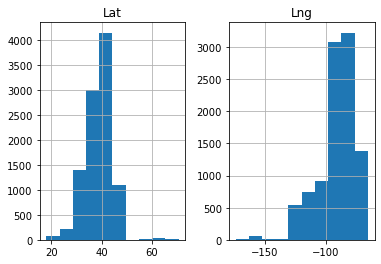

In [7]:
dfMedTr[['Lat', 'Lng']].hist()

**City**
>We know there were no nulls, so just review some of the options and make sure there aren't blanks.

In [8]:
dfMedTr.City.value_counts()

Houston          36
San Antonio      26
Springfield      22
New York         21
Miami            21
                 ..
Brandon           1
Mont Alto         1
Milligan          1
Rocky             1
Peach Orchard     1
Name: City, Length: 6072, dtype: int64

In [9]:
dfMedTr[dfMedTr.City.str.strip() == ""].shape[0]

0

**Population**
>No null values so just check data visually to make the data is valid.

<AxesSubplot:>

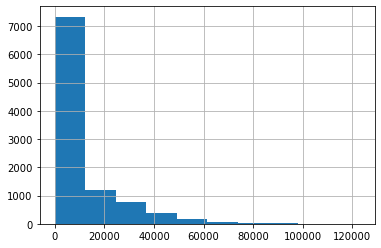

In [10]:
dfMedTr.Population.hist()

In [11]:
dfMedTr[dfMedTr.Population == 0].shape[0]

109

>There are some zero populations, but I could see the population being very low for the bulk of people (below 10,000).  We will replace the zeros with 1 to at least account for the patient themselves.

In [12]:
dfMedTr['Population'] = [i if i != 0 else 1 for i in dfMedTr['Population']]

**Area**
>There are no nulls present, but we will still review the value counts to look for blank strings.

In [13]:
dfMedTr.Area.value_counts()

Rural       3369
Suburban    3328
Urban       3303
Name: Area, dtype: int64

>Since this is an indicator of how close people are to services and other people, I believe we can change this to a sliding scale of 1 for Rural, 2 for Suburban, and 3 for Urban.

In [14]:
# create a list of conditions
conditions = [(dfMedTr['Area'] == "Rural")
              , (dfMedTr['Area'] == "Suburban")
              , (dfMedTr['Area'] == "Urban")]

# create a list of the values
values = [1,2,3]

dfMedTr['AreaClass'] = np.select(conditions, values)
dfMedTr.AreaClass.value_counts()

1    3369
2    3328
3    3303
Name: AreaClass, dtype: int64

<AxesSubplot:>

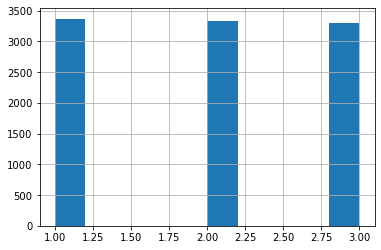

In [15]:
dfMedTr.AreaClass.hist()

**Children**
>There are nulls present, we need to decide how to fill the null values (or remove).

<AxesSubplot:>

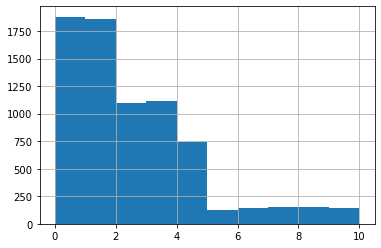

In [16]:
dfMedTr.Children.hist()

>A quick search on Google shows that the average number of children in the U.S. is 1.93.  We will check the mean to see if we are already at that value.

In [17]:
dfMedTr.Children.mean()

2.0982191041554237

>I don't want to remove null records, because that would account for around 1/4th of the dataset.

>Since we are slightly above the correct mean, filling a quarter of the records pulled the average down below the correct mean.  I do not want to assume the correct number of children or use a float, so we will consider the variance to be acceptable in this case and convert the null values to zero.

In [18]:
dfMedTr['Children'].fillna(0, inplace = True)
dfMedTr.Children.mean()

1.5552

**Age**
>There are nulls present, so we will need to decide how to fill.

<AxesSubplot:>

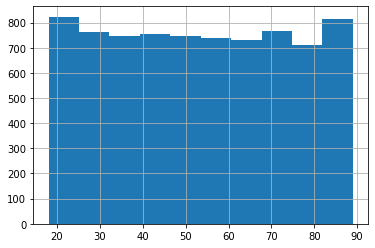

In [19]:
dfMedTr.Age.hist()

In [20]:
dfMedTr.Age.describe()

count    7586.000000
mean       53.295676
std        20.659182
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64

In [21]:
dfMedTr.Age.mode()

0    30.0
dtype: float64

>I do not want to use the mode, because it is skewed towards the bottom.  We will fill the nulls with the average age of 53.

In [22]:
dfMedTr['Age'].fillna(53, inplace = True)

**Education**
>There are no nulls present, so we will check the value counts to make sure there are no blank strings.

In [23]:
dfMedTr.Education.value_counts()

Regular High School Diploma                 2444
Bachelor's Degree                           1724
Some College, 1 or More Years, No Degree    1484
9th Grade to 12th Grade, No Diploma          832
Associate's Degree                           797
Master's Degree                              701
Some College, Less than 1 Year               642
Nursery School to 8th Grade                  552
GED or Alternative Credential                389
Professional School Degree                   208
No Schooling Completed                       133
Doctorate Degree                              94
Name: Education, dtype: int64

>Since this is a progression of education, I am going to create a value that represents the amount of education as a number.  This will allow it to be used in the PCA later.

In [24]:
# create a list of conditions
conditions = [(dfMedTr['Education'] == "No Schooling Completed")
              , (dfMedTr['Education'] == "Nursery School to 8th Grade")
              , (dfMedTr['Education'] == "9th Grade to 12th Grade, No Diploma")
              , (dfMedTr['Education'] == "GED or Alternative Credential")
              , (dfMedTr['Education'] == "Regular High School Diploma")
              , (dfMedTr['Education'] == "Some College, Less than 1 Year")
              , (dfMedTr['Education'] == "Some College, 1 or More Years, No Degree")
              , (dfMedTr['Education'] == "Associate's Degree")
              , (dfMedTr['Education'] == "Professional School Degree")
              , (dfMedTr['Education'] == "Bachelor's Degree")
              , (dfMedTr['Education'] == "Master's Degree")
              , (dfMedTr['Education'] == "Doctorate Degree")]

# create a list of the values
values = [0,1,2,3,4,5,6,7,8,9,10,11]

dfMedTr['EducationClass'] = np.select(conditions, values)
dfMedTr.EducationClass.value_counts()

4     2444
9     1724
6     1484
2      832
7      797
10     701
5      642
1      552
3      389
8      208
0      133
11      94
Name: EducationClass, dtype: int64

<AxesSubplot:>

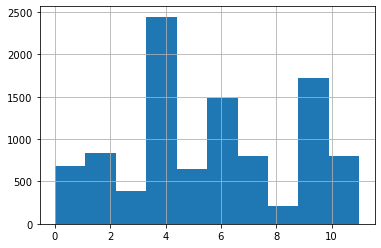

In [25]:
dfMedTr.EducationClass.hist()

**Employment**
>There are no null values, so we will review the current values.

In [26]:
dfMedTr.Employment.value_counts()

Full Time     6029
Student       1017
Part Time      991
Unemployed     983
Retired        980
Name: Employment, dtype: int64

>There are no blanks that need to be filled, and I don't believe this would be appropriate to convert to a numeric representation, so we will leave it as is.

**Income**
>There are nulls present, so we will review the data and make our conclusion on how to handle them.

In [27]:
dfMedTr.Income.isna().sum()

2464

In [28]:
dfMedTr.Income.describe()

count      7536.000000
mean      40484.438268
std       28664.861050
min         154.080000
25%       19450.792500
50%       33942.280000
75%       54075.235000
max      207249.130000
Name: Income, dtype: float64

In [29]:
dfMedTr.Income.mode()

0    14572.40
1    20474.03
2    26915.85
3    37132.97
4    55506.92
dtype: float64

In [30]:
dfMedTr.Income.median()

33942.28

<AxesSubplot:>

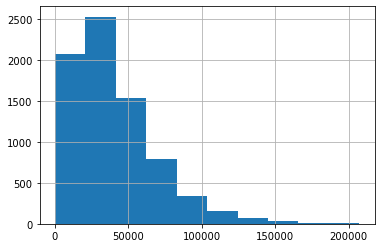

In [31]:
dfMedTr.Income.hist()

>Since this is a very continous number, there are multiple modes and none of them have very many instances.  Due to this, we will use the mean to fill the null values.

In [32]:
dfMedTr.Income.fillna(dfMedTr.Income.mean(), inplace = True)

<AxesSubplot:>

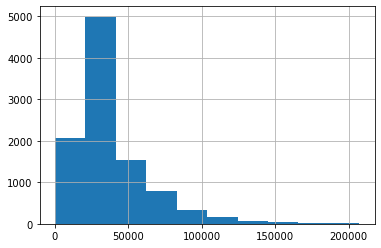

In [33]:
dfMedTr.Income.hist()

**Marital**
>There are no null values, so we will review the current values.

In [34]:
dfMedTr.Marital.value_counts()

Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: Marital, dtype: int64

>There is no further processing recommended for this field.

**ReAdmis**
>There are no null values, so we will review the current values.

In [35]:
dfMedTr.ReAdmis.value_counts()

No     6331
Yes    3669
Name: ReAdmis, dtype: int64

>This is the value we hope to predict.  There are no blanks, so no further processing is recommended.

**Gender**
>There are no null values, so we will review the current values.

In [36]:
dfMedTr.Gender.value_counts()

Female                  5018
Male                    4768
Prefer not to answer     214
Name: Gender, dtype: int64

>There is no further processing recommended for this field.

**vitD_levels**
>There are no null values, so we will review the current values.

<AxesSubplot:>

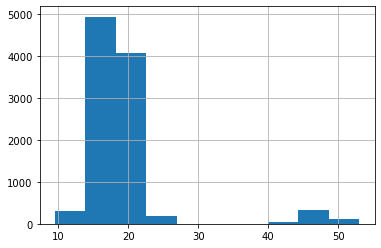

In [37]:
dfMedTr.vitD_levels.hist()

>There are no blank values and no outliers (besides a large group of low and a small group of high results).  There is no further processing recommended for this field.

**doc_visits**
>There are no null values, so we will review the current values.

<AxesSubplot:>

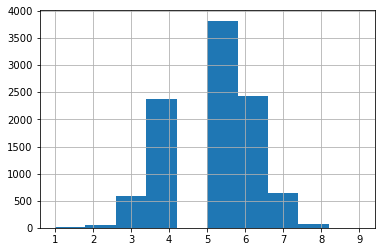

In [38]:
dfMedTr.doc_visits.hist()

>There is no further processing recommended for this field.

**full_meals_eaten**
>There are no null values, so we will review the current values.

<AxesSubplot:>

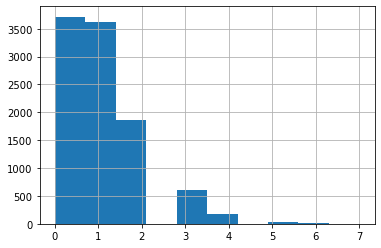

In [39]:
dfMedTr.full_meals_eaten.hist()

>There is no further processing recommended for this field.

**vitD_supp**
>There are no null values, so we will review the current values.

<AxesSubplot:>

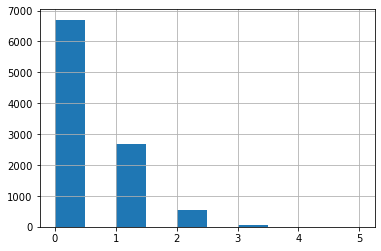

In [40]:
dfMedTr.vitD_supp.hist()

>There is no further processing recommended for this field.

**Soft_drink**
>There null values present, so we will review the current values and make a determination on how to proceed.

In [41]:
dfMedTr.Soft_drink.value_counts()

No     5589
Yes    1944
Name: Soft_drink, dtype: int64

>Since only half of the population drinks any soda daily, and the average for them is under 3, I believe that we would be safe filling the remaining 2,467 records with "No".

In [42]:
dfMedTr.Soft_drink.fillna("No", inplace = True)

**Initial_Admin**
>There are no null values, so we will review the current values.

In [43]:
dfMedTr.Initial_Admin.value_counts()

Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: Initial_Admin, dtype: int64

>There is no further processing recommended for this field.

**HighBlood**
>There are no null values, so we will review the current values.

In [44]:
dfMedTr.HighBlood.value_counts()

No     5910
Yes    4090
Name: HighBlood, dtype: int64

>There is no further processing recommended for this field.

**Stroke**
>There are no null values, so we will review the current values.

In [45]:
dfMedTr.Stroke.value_counts()

No     8007
Yes    1993
Name: Stroke, dtype: int64

>There is no further processing recommended for this field.

**Complication_Risk**
>There are no null values, so we will review the current values.

<AxesSubplot:>

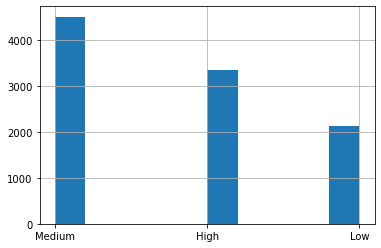

In [46]:
dfMedTr.Complication_Risk.hist()

>Since this is a progression, we will encode this as a number so it can be used in the PCA.

<AxesSubplot:>

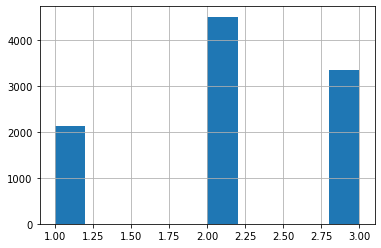

In [47]:
# create a list of conditions
conditions = [(dfMedTr['Complication_Risk'] == "Low")
              , (dfMedTr['Complication_Risk'] == "Medium")
              , (dfMedTr['Complication_Risk'] == "High")]

# create a list of the values
values = [1,2,3]

dfMedTr['Complication_RiskClass'] = np.select(conditions, values)
dfMedTr.Complication_RiskClass.hist()

**Overweight**
>There are null values, so we will review and decide how to proceed.

In [48]:
dfMedTr.Overweight.value_counts()

1.0    6395
0.0    2623
Name: Overweight, dtype: int64

>Since almost 40% of Americans are overweight, we will default the null values to 0.0 so we get closer to the national average.

In [49]:
dfMedTr.Overweight.fillna(0.0, inplace = True)

**Arthritis**
>There are no null values, so we will review the current values.

In [50]:
dfMedTr.Arthritis.value_counts()

No     6426
Yes    3574
Name: Arthritis, dtype: int64

>There is no further processing recommended for this field.

**Diabetes**
>There are no null values, so we will review the current values.

In [51]:
dfMedTr.Diabetes.value_counts()

No     7262
Yes    2738
Name: Diabetes, dtype: int64

>There is no further processing recommended for this field.

**Hyperlipidemia**
>There are no null values, so we will review the current values.

In [52]:
dfMedTr.Hyperlipidemia.value_counts()

No     6628
Yes    3372
Name: Hyperlipidemia, dtype: int64

>There is no further processing recommended for this field.

**BackPain**
>There are no null values, so we will review the current values.

In [53]:
dfMedTr.BackPain.value_counts()

No     5886
Yes    4114
Name: BackPain, dtype: int64

>There is no further processing recommended for this field.

**Anxiety**
>There are null values, so we will review and decide how to proceed.

<AxesSubplot:>

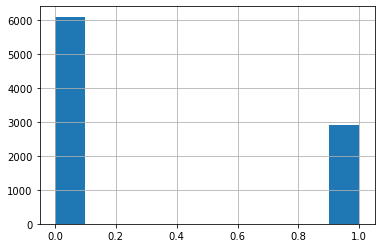

In [54]:
dfMedTr.Anxiety.hist()

>Since only 18% of the population has anxiety disorders, we will assume that the null values should be 0 (False).

In [55]:
dfMedTr.Anxiety.fillna(0.0, inplace = True)

**Allergic_rhinitis**
>There are no null values, so we will review the current values.

In [56]:
dfMedTr.Allergic_rhinitis.value_counts()

No     6059
Yes    3941
Name: Allergic_rhinitis, dtype: int64

>There is no further processing recommended for this field.

**Reflux_esophagitis**
>There are no null values, so we will review the current values.

In [57]:
dfMedTr.Reflux_esophagitis.value_counts()

No     5865
Yes    4135
Name: Reflux_esophagitis, dtype: int64

>There is no further processing recommended for this field.

**Asthma**
>There are no null values, so we will review the current values.

In [58]:
dfMedTr.Asthma.value_counts()

No     7107
Yes    2893
Name: Asthma, dtype: int64

>There is no further processing recommended for this field.

**Services**
>There are no null values, so we will review the current values.

In [59]:
dfMedTr.Services.value_counts()

Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: Services, dtype: int64

>There is no further processing recommended for this field.

**Initial_Days**
>There are null values present, so we will review and decide how to proceed.

<AxesSubplot:>

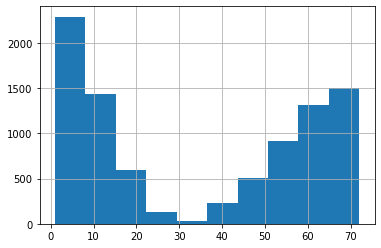

In [60]:
dfMedTr.Initial_Days.hist()

In [61]:
dfMedTr.Initial_Days.describe()

count    8944.000000
mean       34.432082
std        26.287050
min         1.001981
25%         7.911709
50%        34.446941
75%        61.124654
max        71.981486
Name: Initial_Days, dtype: float64

In [62]:
dfMedTr.Initial_Days.median()

34.4469412918404

>Since I feel like this would have a large impact (or at least correlation) with readmissions, I don't feel comfortable defaulting this to ANY value.  Therefore we will remove the records that are missing this information.

In [63]:
dfMedTr.dropna(subset = ['Initial_Days'], inplace = True)

<AxesSubplot:>

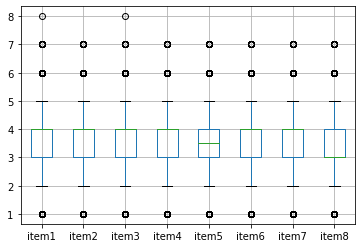

In [64]:
## item1-8 - no nulls present, make sure the values all range between 1 and 8
dfMedTr.boxplot(['item1','item2','item3','item4','item5','item6','item7','item8'])

In [65]:
## Remove the columns that we converted to numeric representations
dfMedTr.drop(columns = ['Area','Education','Complication_Risk'], inplace = True)

In [66]:
dfMedTr.shape

(8944, 41)

##### Data Cleaning Findings

The only real limitation during the cleaning was the empty records for Initial_days.  Due to my perceived sensitvity of that value, I don't feel comfortable defaulting to any value.  Because of this, our dataset shrank by around 10%.

We will now save the dataset and begin Principal Component Analysis.

In [67]:
dfMedTr.to_csv('medical_cleaned.csv')

#### E.  Apply principal component analysis (PCA) to identify the significant features of the data set by doing the following: 

The Prinicpal Components will now be analyzed.  They are the continuous columns, that have impact on the question/result.  Since we removed the columns that had no impact - we will now grab the subset of continuous columns.
<br/>
<br/>
I originally considerd converted the yes/no columns to 0 and 1, but research suggested that binary columns are not best suited by PCA.  Therefore I am only including columns that go beyond true/false, 0/1, yes/no.

In [68]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

dfMedForPCA = dfMedTr[['Lat','Lng','Population','AreaClass','Children','Age','EducationClass'
                       ,'Income','vitD_levels','doc_visits','full_meals_eaten','vitD_supp'
                       ,'Complication_RiskClass','item1','item2','item3'
                       ,'item4','item5','item6','item7','item8']]
dfMedForPCA.shape

(8944, 21)

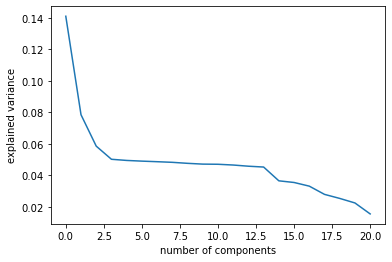

In [69]:
# Normalize
dfMedForPCA = (dfMedForPCA - dfMedForPCA.mean()) / dfMedForPCA.std()

# Extracts ALL - shape[1] is the number of columns
pca = PCA(n_components = dfMedForPCA.shape[1])

# Fit and collect data on the PCA
pca.fit(dfMedForPCA)
med_pca = pd.DataFrame(pca.transform(dfMedForPCA)
                       , columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'
                                  ,'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18'
                                  ,'PC19','PC20','PC21'])

# Display scree plot
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

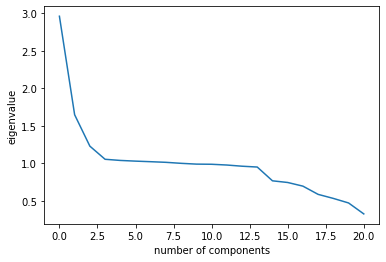

In [70]:
# Display eigenvalues scree plot
import numpy as np
cov_matrix = np.dot(dfMedForPCA.T, dfMedForPCA) / dfMedForPCA.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.show()

In [71]:
eigenvalues

[2.9614769985357228,
 1.6484717185216233,
 1.2297449016612911,
 1.0546414122212788,
 1.0392182980612388,
 1.0299903019017713,
 1.022339896832639,
 1.013976773448205,
 1.000646344372877,
 0.9901484889025732,
 0.9880842493558784,
 0.9780110701140265,
 0.9622439825230933,
 0.9511387091719605,
 0.7674526191124847,
 0.7452758311222754,
 0.6965162244483725,
 0.586770867284266,
 0.5328844918022342,
 0.47236824988594595,
 0.3262506279653295]

In [72]:
# Output loadings
loadings = pd.DataFrame(pca.components_.T
                        , columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'
                                   ,'PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17'
                                   ,'PC18','PC19','PC20','PC21']
                        , index=dfMedForPCA.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
Lat,0.008710,0.001053,-0.715304,0.089132,0.063578,0.023064,0.018933,-0.010820,0.008821,-0.025137,-0.046676,-0.031378,-0.015550,-0.104309,0.133992,-0.650974,-0.133362,-0.026892,0.006185,-0.001673,0.001575
Lng,0.002599,-0.002246,0.260457,-0.608438,-0.272427,0.331488,0.162968,0.093598,-0.101845,0.207658,0.234163,-0.219840,-0.160611,0.074451,0.030929,-0.388987,-0.046552,0.002728,0.002656,-0.005874,0.007462
Population,0.006047,0.033015,0.626842,0.320697,0.070157,-0.168930,-0.079989,-0.123143,0.086470,-0.120919,-0.166893,0.093817,0.095939,0.039763,0.138927,-0.584990,-0.124561,-0.014956,-0.025620,-0.024772,-0.003525
AreaClass,-0.003756,-0.006510,0.074807,0.169639,0.209057,-0.433032,0.328055,0.303349,-0.330640,-0.140892,0.293219,-0.267200,-0.467227,-0.156312,0.036233,-0.019687,0.038498,-0.018012,0.041316,-0.014478,0.001717
Children,0.000342,0.021292,0.017054,0.257086,-0.077145,-0.081375,0.295094,0.191204,0.479462,0.731753,0.014675,0.090312,-0.098558,-0.105946,0.035517,0.009271,0.004108,0.015960,-0.023305,-0.011490,0.000006
Age,-0.001813,0.006600,0.012650,-0.431315,0.045426,-0.280270,0.293836,-0.021883,0.346659,-0.317314,0.171944,0.479808,0.131720,-0.382259,0.037549,-0.021324,-0.007574,0.014935,-0.000580,0.003647,-0.007368
EducationClass,0.003588,0.018282,0.069661,0.033212,0.015963,0.375361,-0.337994,0.563164,0.191914,-0.219570,-0.244786,0.164775,-0.406515,-0.286412,0.020758,0.002741,0.011695,-0.016983,0.007690,-0.027596,-0.008389
Income,0.000572,-0.014397,0.053273,0.140167,0.442562,0.295799,-0.092326,0.319888,-0.161890,0.115785,0.547727,0.188573,0.447680,-0.016580,-0.047426,-0.068693,0.009955,0.004439,0.001627,-0.008345,-0.008173
vitD_levels,-0.004683,-0.043230,0.008210,-0.280384,0.217141,-0.219936,0.157065,0.489197,-0.061622,0.058624,-0.539932,-0.255511,0.434064,0.078571,0.012876,-0.005532,-0.021044,-0.009326,-0.019313,0.003196,0.013416
doc_visits,0.010128,-0.011262,0.012482,-0.022288,0.429508,0.188729,0.103580,-0.136076,0.613059,-0.254439,0.123814,-0.496581,-0.070714,0.194605,-0.038822,0.039824,-0.030246,-0.014396,0.005778,-0.010675,-0.006359


##### Conclusion
Based on the eigenvalues (above 1), we should use 9 groupings of the principal components.  The fields that have the strongest affect on the 9th grouping the are the following -

- doc_visits: 0.6131
- Children: 0.4795
- Age: 0.3467

This PCA analysis will help us optimize the performance while retaining the most important groupings, and increase accruracy.

### Part IV. Supporting Documents 

#### References

[Google Search for Average Number of Children per Household](https://www.google.com/search?q=average+number+of+children+per+family+usa&oq=av&aqs=chrome.0.35i39j0i67j69i57j35i39j0i67i457j0i67j69i61l2.965j0j7&sourceid=chrome&ie=UTF-8)
    

[Google Search for Average Soda Consumption per Day](https://www.google.com/search?q=average+soda+consumption+per+day&oq=average+sodas+consu&aqs=chrome.2.69i57j0i22i30i457j0i22i30l5.7469j0j7&sourceid=chrome&ie=UTF-8)

[Google Search for Rate of Anxiety](https://www.google.com/search?sxsrf=ALeKk02TGMr-loUSVlNpJVRnThfn1V7Yyg%3A1606670279029&ei=x9fDX8OiAdHR5gKOnpqIBg&q=how+many+americans+have+anxiety&oq=how+many+americans+have+anxi&gs_lcp=CgZwc3ktYWIQAxgAMgUIABDJAzoECAAQRzoICAAQsQMQyQM6BQgAELEDOgIIADoECAAQQ1CJgRhY8pUYYISfGGgBcAN4AIABkQGIAdUGkgEDOS4xmAEAoAEBqgEHZ3dzLXdpesgBCMABAQ&sclient=psy-ab)

[Stack Overflow Discussion on PCA for Categorical Values](https://stackoverflow.com/questions/40795141/pca-for-categorical-features)

[UCertify Course D206 for Data Cleaning](https://wgu.ucertify.com/?func=load_course&course=WGU-D206)